<a href="https://colab.research.google.com/github/HChandeepa/Sri_Lanka_Food_Prices_Analysis/blob/Master/Sri_Lanka_Food_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive, files
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka.csv')

In [ ]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [ ]:
df.describe()

,latitude,longitude,price,usdprice
count,18377.000000,18377.000000,18506.000000,18506.000000
mean,7.481010,80.568017,581.991651,1.953836
std,0.947683,0.533244,606.396366,1.920414
min,5.952000,79.831700,11.500000,0.060200
25%,6.906044,80.045803,150.000000,0.655825
50%,7.253400,80.515701,320.120000,1.043450
75%,8.038129,81.005890,883.207500,2.930650
max,9.656700,81.700000,3735.420000,11.945700


In [ ]:
df.isnull().sum()

,0
date,0
admin1,129
admin2,129
market,0
latitude,129
longitude,129
category,0
commodity,0
unit,0
priceflag,0


In [ ]:
df.dropna(subset=['admin1', 'admin2', 'latitude', 'longitude'], inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


In [ ]:
df.dtypes

,0
date,object
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
0,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725,2004,1
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718,2004,2
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738,2004,3
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4


In [ ]:
df['year'].dtype

dtype('int32')

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
df['year'].dtype

dtype('int64')

In [ ]:
df['commodity'].unique()

array(['Wheat flour', 'Rice (red nadu)', 'Rice (white)', 'Sugar',
       'Rice (long grain)', 'Fuel (diesel)', 'Fuel (petrol-gasoline)',
       'Potatoes (imported)', 'Potatoes (local)', 'Chili (red, dry raw)',
       'Beans', 'Carrots', 'Coconut', 'Eggplants', 'Onions (red, local)',
       'Pumpkin', 'Snake gourd', 'Rice (medium grain)', 'Rice (red)',
       'Fish (dry, katta)', 'Fish (dry, sprats)', 'Lentils', 'Bananas',
       'Cabbage', 'Onions (imported)', 'Onions (red, imported)',
       'Pineapples', 'Fish (goldstripe sardinella)', 'Fish (jack)',
       'Fish (sail fish)', 'Fish (skipjack tuna)',
       'Fish (trenched sardinella)', 'Fish (yellowfin tuna)', 'Tomatoes',
       'Eggs', 'Papaya', 'Oil (coconut)', 'Onions (red)',
       'Meat (chicken, fresh)', 'Cowpeas (whole, average)',
       'Meat (chicken, broiler)', 'Beans (mung)'], dtype=object)

In [ ]:
df['admin1'].unique()

array(['Western', 'Eastern', 'Northern', 'Central', 'North Central',
       'North Western', 'Sabaragamuwa', 'Southern', 'Uva'], dtype=object)

In [ ]:
df['admin2'].unique()

array(['Colombo', 'Ampara', 'Batticaloa', 'Trincomalee', 'Jaffna',
       'Kilinochchi', 'Mannar', 'Mullattivu', 'Vavuniya', 'Kandy',
       'Matale', 'Nuwara Eliya', 'Anuradhapura', 'Polonnaruwa',
       'Kurunegala', 'Puttalam', 'Ratnapura', 'Galle', 'Hambantota',
       'Matara', 'Badulla', 'Moneragala', 'Gampaha', 'Kalutara',
       'Kegalle'], dtype=object)

In [ ]:
df['market'].unique()

array(['Colombo City', 'Ampara', 'Batticaloa', 'Trincomalee', 'Jaffna',
       'Kilinochchi', 'Mannar', 'Mulaitivu', 'Vavuniya', 'Kandy',
       'Matale', 'Nuwara Eliya', 'Anuradhapura', 'Polonnaruwa',
       'Kurunegala', 'Puttalam', 'Rathnapura', 'Galle', 'Hambantota',
       'Matara', 'Badulla', 'Monaragala', 'Gampaha', 'Kalutara',
       'Kegalle', 'Economic Centre-Dambulla', 'Economic Centre-Pettah',
       'Economic Centre-Maradagahamula', 'Fish market-Negombo',
       'Fish market-Peliyagoda', 'Economic Centre - Peliyagoda',
       'Hanguranketha', 'Dehiattakandiya', 'Galenbindunuwewa',
       'Thambuttegama', 'Nikaweratiya', 'Mullativu', 'Embilipitiya',
       'Tissamaharama', 'Bandarawela', 'Keppetipola (DEC}', 'Dammbagalla',
       'Meegoda(DEC)'], dtype=object)

In [ ]:
df.rename(columns={'admin1': 'province', 'admin2': 'district'}, inplace=True)

In [ ]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
0,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725,2004,1
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718,2004,2
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738,2004,3
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4


In [ ]:
df['category'].unique()

array(['cereals and tubers', 'miscellaneous food', 'non-food',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'oil and fats'], dtype=object)

In [ ]:
df['priceflag'].unique()

array(['actual'], dtype=object)

In [ ]:
df['pricetype'].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [ ]:
df['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
df['unit'].unique()

array(['KG', 'L', 'Unit', '750 ML'], dtype=object)

In [ ]:
df_grouped = df.groupby(['year', 'commodity'])['price'].mean().reset_index()
print(df_grouped.head())

   year        commodity      price
0  2004  Rice (red nadu)  43.831333
1  2004      Wheat flour  43.534000
2  2005  Rice (red nadu)  33.355714
3  2005      Wheat flour  30.298000
4  2006  Rice (red nadu)  31.629077


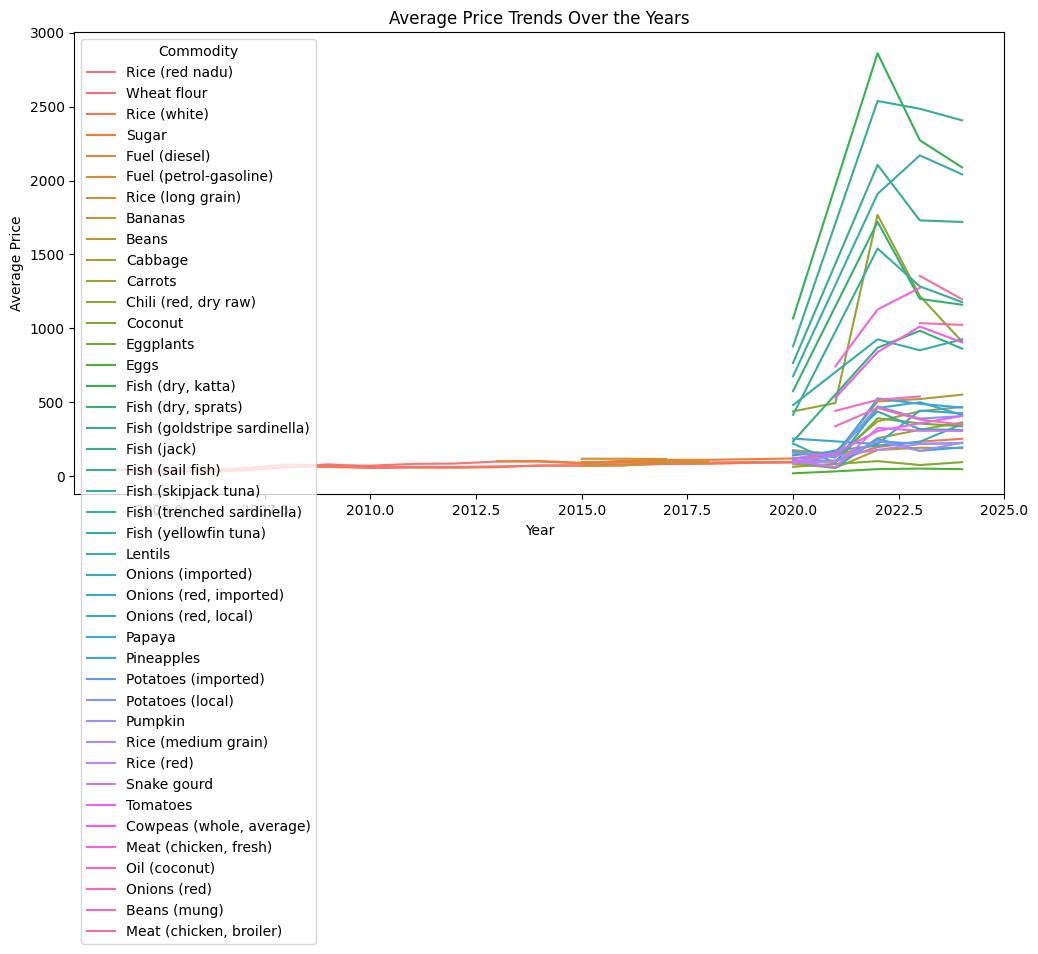

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='year', y='price', hue='commodity')
plt.title('Average Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Commodity')
plt.show()

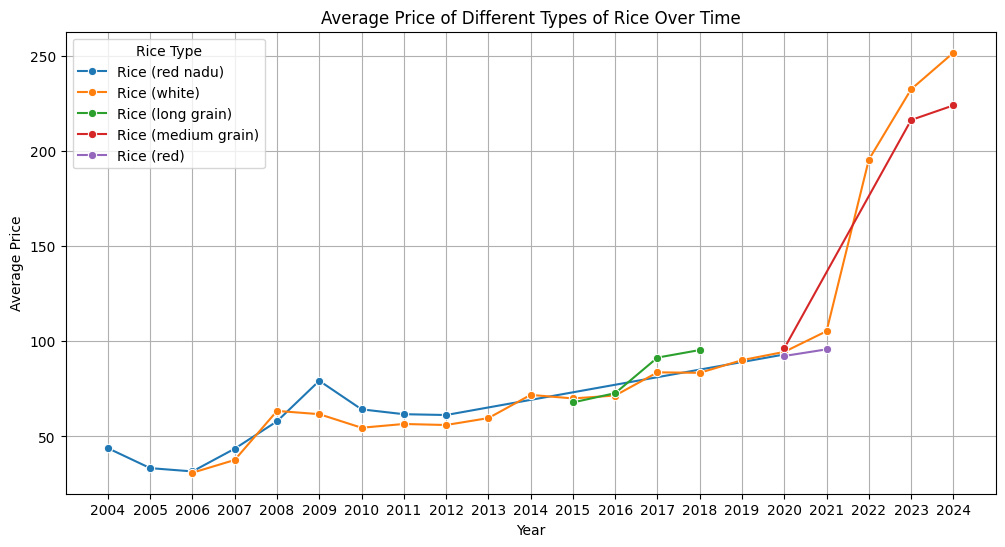

In [ ]:
import matplotlib.ticker as mticker

# Filter rice commodities
rice_types = df[df['commodity'].str.contains('Rice', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
rice_prices = rice_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Convert year to integer to remove decimal points
rice_prices['year'] = rice_prices['year'].astype(int)

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Different Types of Rice Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Rice Type')

# Set x-ticks only for years that exist in rice_prices
plt.xticks(ticks=rice_prices['year'].unique(), labels=rice_prices['year'].unique())

plt.grid(True)
plt.show()


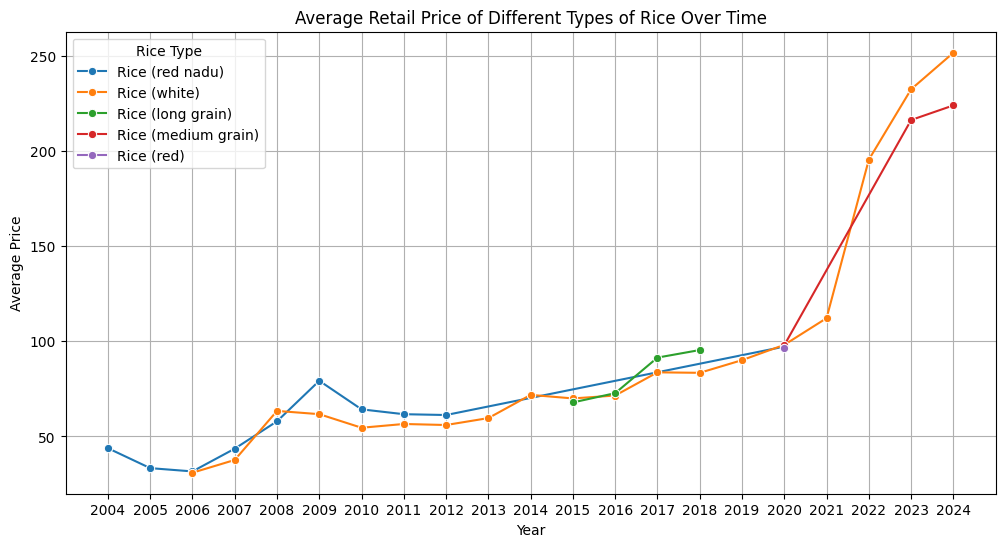

In [ ]:
import matplotlib.ticker as mticker

# Filter rice commodities and only Retail prices
rice_types = df[
    (df['commodity'].str.contains('Rice', case=False, na=False)) &
    (df['pricetype'] == 'Retail')
]

# Group by year and commodity, then calculate the mean price
rice_prices = rice_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Convert year to integer to remove decimal points
rice_prices['year'] = rice_prices['year'].astype(int)

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Retail Price of Different Types of Rice Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Rice Type')

# Set x-ticks only for years that exist in rice_prices
plt.xticks(ticks=rice_prices['year'].unique(), labels=rice_prices['year'].unique())

plt.grid(True)
plt.show()

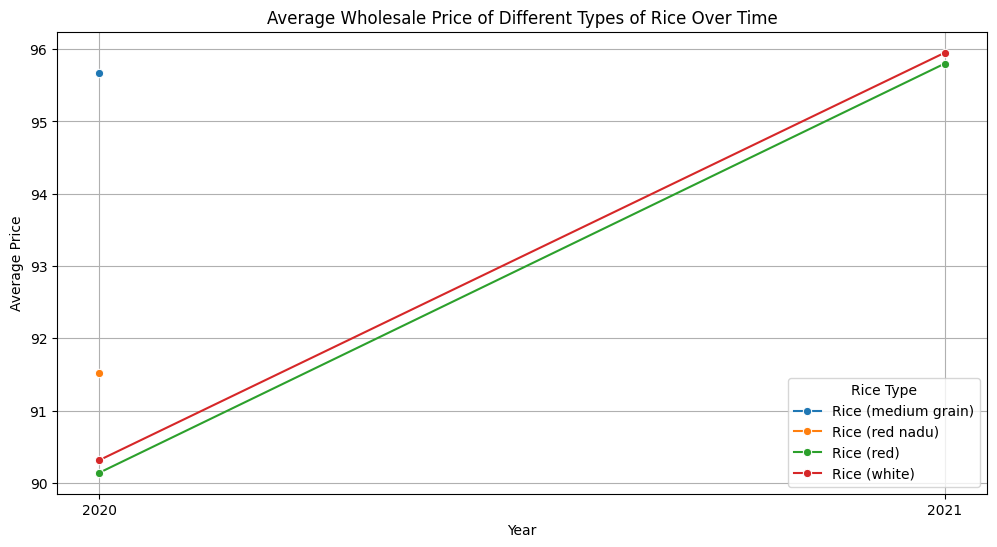

In [ ]:
import matplotlib.ticker as mticker

# Filter rice commodities and only Retail prices
rice_types = df[
    (df['commodity'].str.contains('Rice', case=False, na=False)) &
    (df['pricetype'] == 'Wholesale')
]

# Group by year and commodity, then calculate the mean price
rice_prices = rice_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Convert year to integer to remove decimal points
rice_prices['year'] = rice_prices['year'].astype(int)

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Wholesale Price of Different Types of Rice Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Rice Type')

# Set x-ticks only for years that exist in rice_prices
plt.xticks(ticks=rice_prices['year'].unique(), labels=rice_prices['year'].unique())

plt.grid(True)
plt.show()

In [ ]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
0,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725,2004,1
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718,2004,2
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738,2004,3
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4


In [ ]:
df.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice', 'year', 'month'],
      dtype='object')

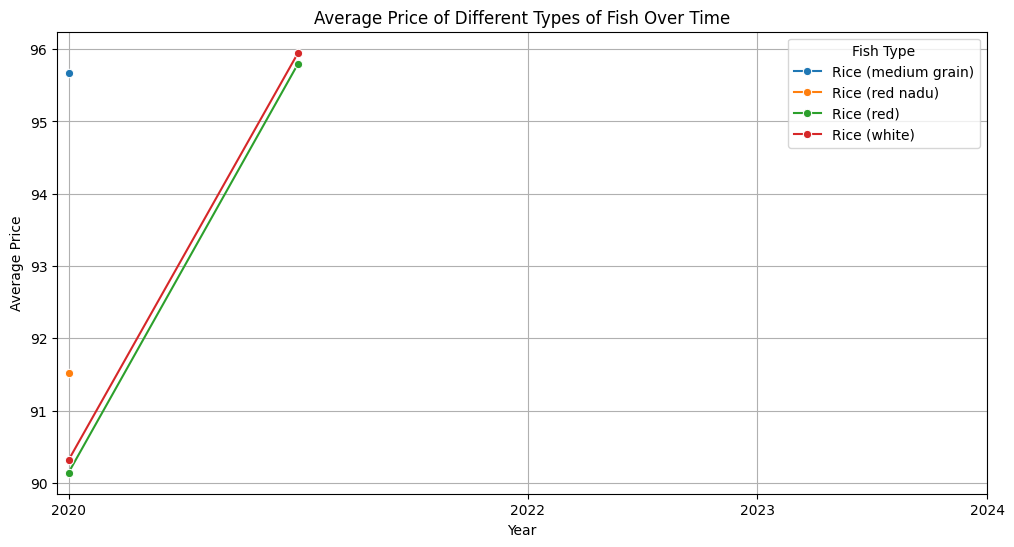

In [ ]:
import matplotlib.ticker as mticker


# Filter rice commodities
fish_types = df[df['commodity'].str.contains('Fish', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
fish_prices = fish_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Different Types of Fish Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Fish Type')
plt.xticks(ticks=fish_prices['year'].unique(), labels=fish_prices['year'].unique())
plt.grid(True)
plt.show()

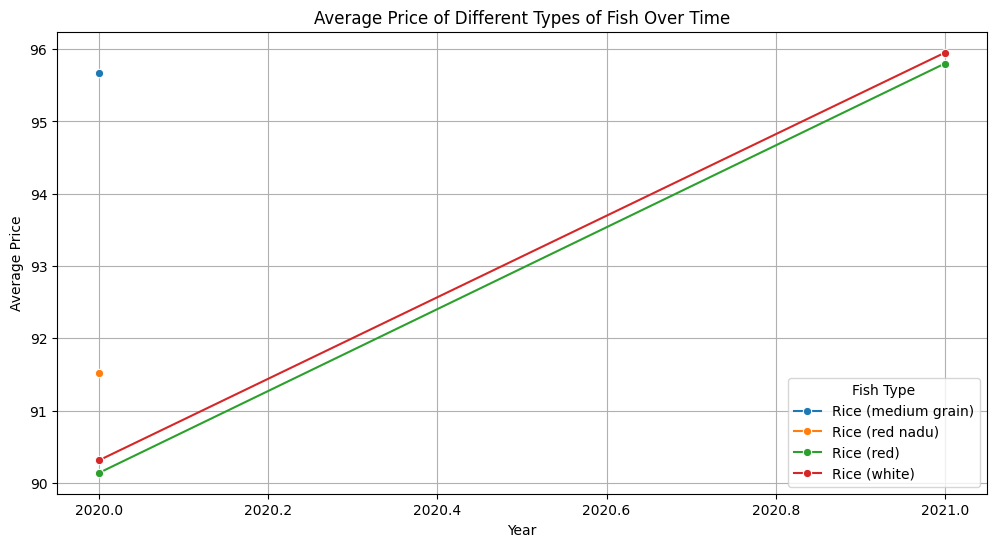

In [ ]:
# Filter rice commodities
fish_types = df[df['commodity'].str.contains('Fish', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
fish_prices = fish_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Different Types of Fish Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Fish Type')
#plt.xticks(ticks=fish_prices['year'].unique(), labels=fish_prices['year'].unique())
plt.grid(True)
plt.show()

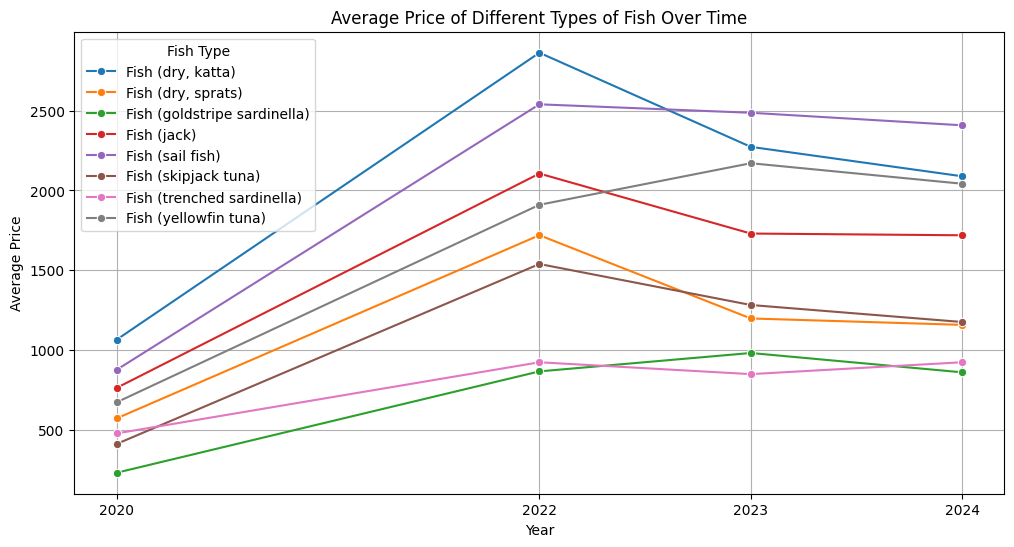

In [ ]:
import matplotlib.ticker as mticker

# Filter rice commodities
fish_types = df[df['commodity'].str.contains('Fish', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
fish_prices = fish_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=fish_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Different Types of Fish Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Fish Type')
plt.xticks(ticks=fish_prices['year'].unique(), labels=fish_prices['year'].unique())
plt.grid(True)
plt.show()

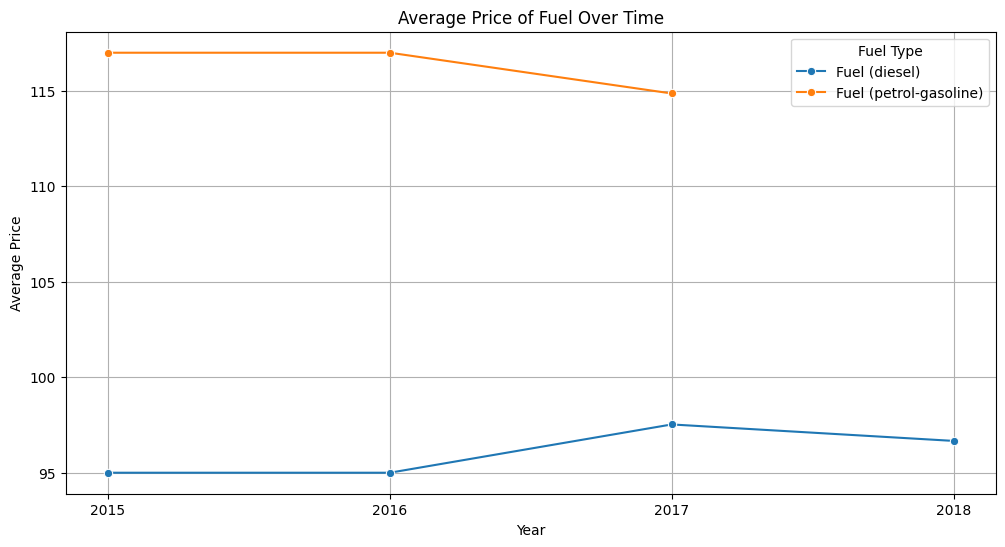

In [ ]:
import matplotlib.ticker as mticker

# Filter rice commodities
fuel_types = df[df['commodity'].str.contains('Fuel', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
fuel_prices = fuel_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=fuel_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Fuel Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Fuel Type')
plt.xticks(ticks=fuel_prices['year'].unique(), labels=fuel_prices['year'].unique())
plt.grid(True)
plt.show()

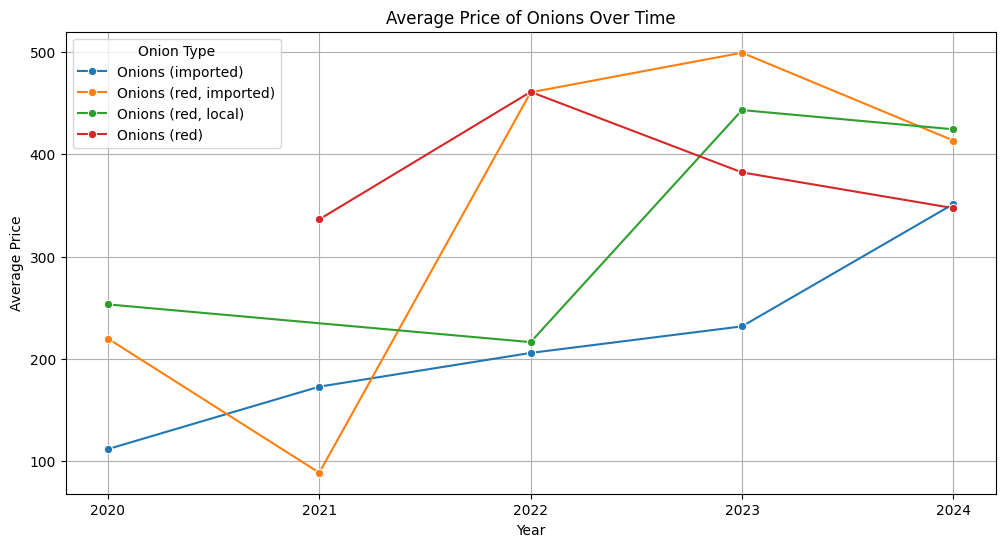

In [ ]:
import matplotlib.ticker as mticker

# Filter rice commodities
Onions_types = df[df['commodity'].str.contains('Onions', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
Onions_prices = Onions_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=Onions_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Onions Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Onion Type')
plt.xticks(ticks=Onions_prices['year'].unique(), labels=Onions_prices['year'].unique().astype(int))
plt.grid(True)
plt.show()

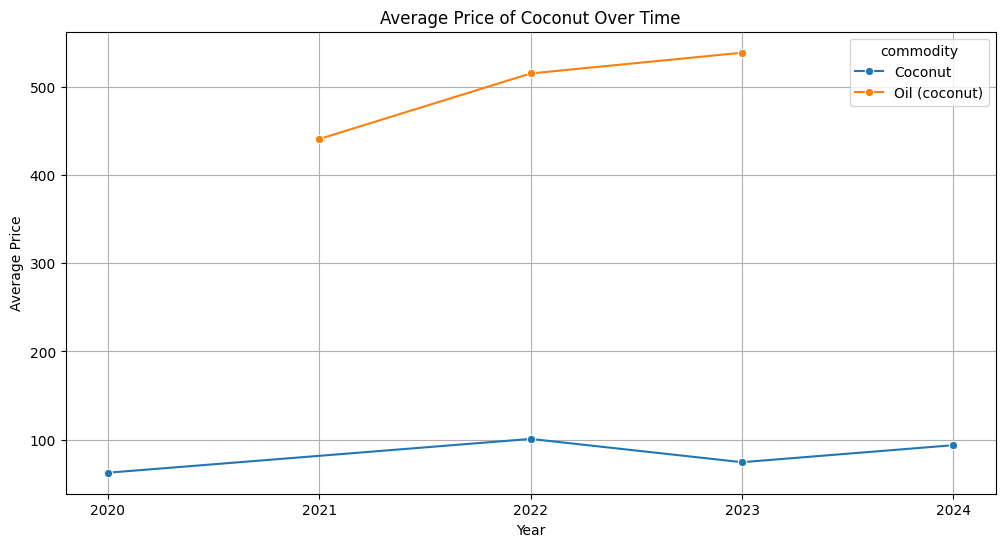

In [ ]:
import matplotlib.ticker as mticker

# Filter coconut commodities
coconut_prices = df[df['commodity'].str.contains('coconut', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
coconut_prices = coconut_prices.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Convert year to integer to remove decimal points
coconut_prices['year'] = coconut_prices['year'].astype(int)

# Plot coconut price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=coconut_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Coconut Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Set x-ticks only for years that exist in coconut_prices
plt.xticks(ticks=coconut_prices['year'].unique(), labels=coconut_prices['year'].unique())

plt.grid(True)
plt.show()

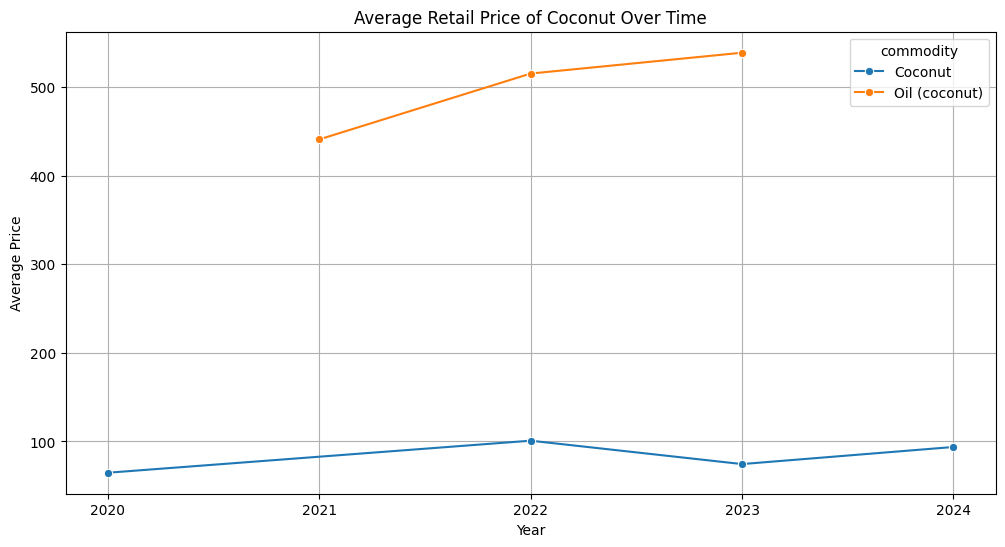

In [ ]:
import matplotlib.ticker as mticker

# Filter coconut commodities and only Retail prices
coconut_prices = df[
    (df['commodity'].str.contains('coconut', case=False, na=False)) &
    (df['pricetype'] == 'Retail')
]

# Group by year and commodity, then calculate the mean price
coconut_prices = coconut_prices.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Convert year to integer to remove decimal points
coconut_prices['year'] = coconut_prices['year'].astype(int)

# Plot coconut price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=coconut_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Retail Price of Coconut Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Set x-ticks only for years that exist in coconut_prices
plt.xticks(ticks=coconut_prices['year'].unique(), labels=coconut_prices['year'].unique())

plt.grid(True)
plt.show()

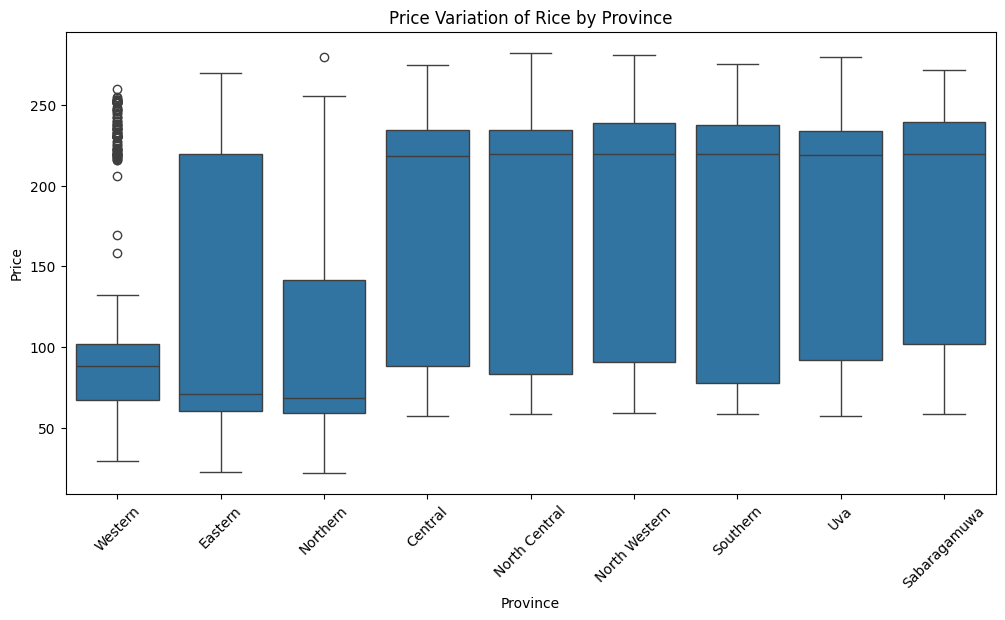

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only Rice commodities
rice_data = df[df['commodity'].str.contains('Rice', case=False, na=False)]

# Create boxplot for price variation by province
plt.figure(figsize=(12, 6))
sns.boxplot(data=rice_data, x='province', y='price')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Price Variation of Rice by Province')
plt.xlabel('Province')
plt.ylabel('Price')
plt.show()

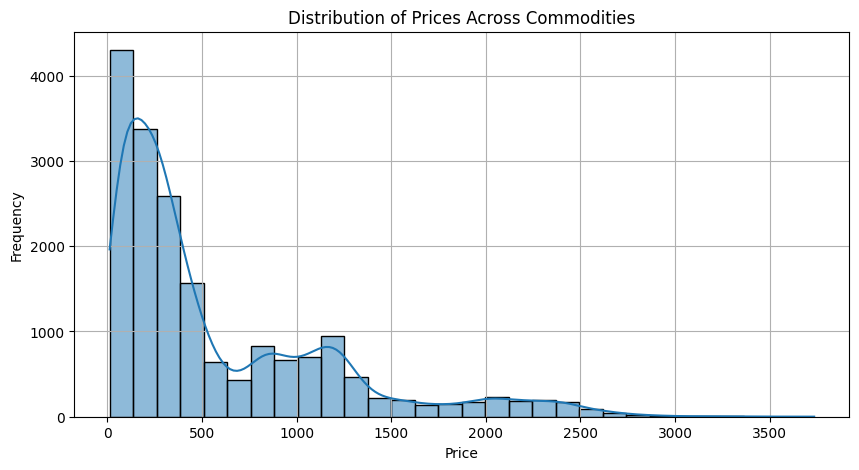

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices Across Commodities')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()